# Predicting Home Values

by Kaniela Denis, 13 December 2011

## Project Goal
- A model that predicts property tax assessed values of single family properties based on 2017 transactions.
- Identify ways to make a better model for Zillow.
- Create new features out of existing features.
- Try non-linear regression model or try a model for each county.


## Project Description



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import modeling

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_zillow()

In [3]:
train,validate,test, df = prepare.split(df)

## Initial Questions
- What are the transactions are in 2017?
- What states and counties are the properties located in?
- What is the tax rate per county? 
- What is the distribution of tax_value for each county?
- What are the locations of the high value properties?
- What are the drivers of single family property values?

# Explore

## Context
- 43K records
- Highest home value is 1.3M
- Lowest home value is 3K
- Average home value is 343K
- Most homes are below 380K
- Houses are in Los Angeles County (6037), Orange County (6059) , Ventura County (6111)
- Most common bedroom count: 3 (2,3,4,5)
- Most common bathroom count: 2 (1,2,3,4)
- Most common lot_size is between 5K-7K sqft
- Most common house area sqft is between 1K and 1.75K
- Most houses are in Los Angeles County
- Most houses are between latitude 33600000 and 34300000
- Most houses are between longitude -118600000 and -117600000

### What are the transactions are in 2017?
- Started with 52.5K houses, removed 5K for outliers/nulls, 43K houses remaining

### What states and counties are the properties located in?
- California. Counties: Los Angeles, Ventura, Orange

### What is the tax rate per county? 
- Los Angele County Tax Rate: 1.42%
- Orange County Tax Rate: 1.21%
- Vetura County Tax Rate: 1.18%

### What are the average tax amounts per county

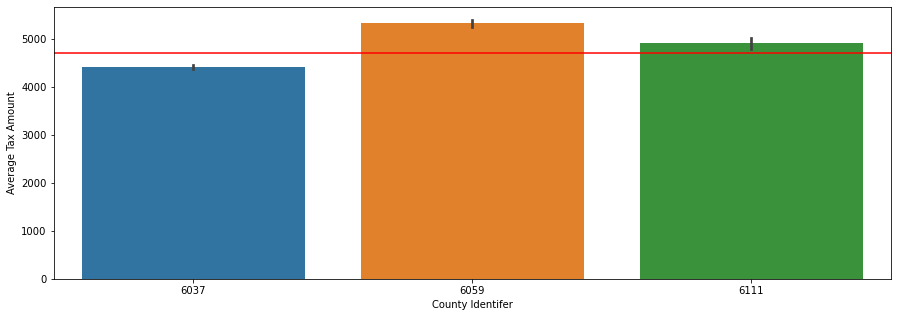

In [4]:
# Show Average House Tax Amounts Aross Counties
plt.figure(figsize=(15,5))
sns.barplot(x=train.fips, y=train.tax_amount)
plt.axhline(y=train.tax_amount.mean(), color='r')
plt.xlabel('County Identifer')
plt.ylabel('Average Tax Amount')
plt.show()

### No significant differences between tax amounts across counties

### What is the average house value per county?

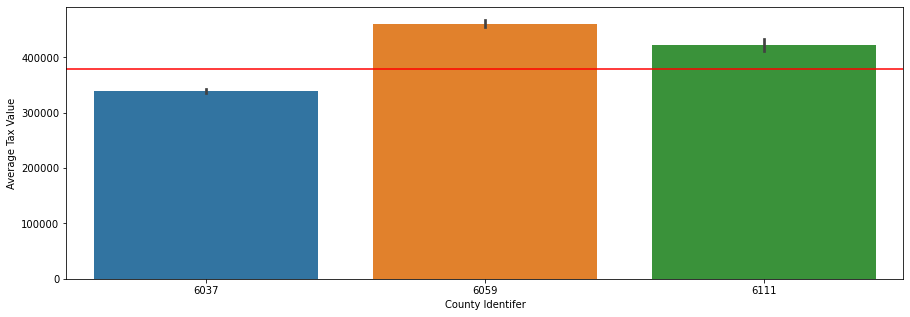

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(x=train.fips, y=train.tax_value)
plt.axhline(y=train.tax_value.mean(), color='red')
plt.xlabel('County Identifer')
plt.ylabel('Average Tax Value')
plt.show()

### Los Angeles County has a lower average house value than either Orange or Ventury County individually or combinedd

### What is the distribution of House Value for each county?

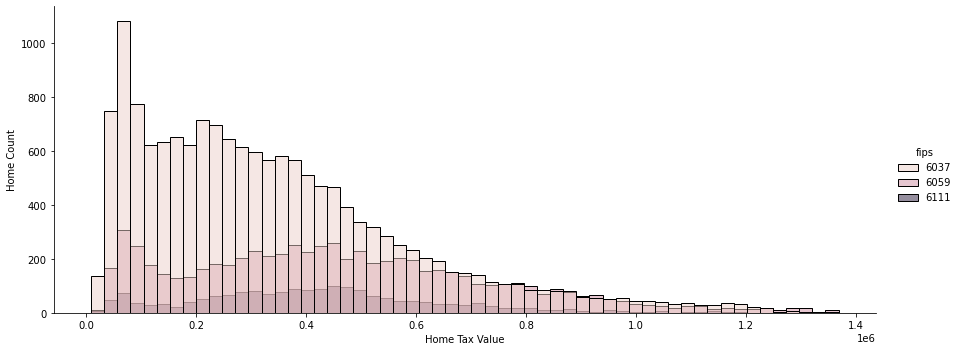

In [6]:
sns.displot(x=train.tax_value, hue=train.fips, height=5, aspect=2.5)
plt.xlabel('Home Tax Value')
plt.ylabel('Home Count')
plt.show()

### LA County has the most houses with most of those peaking between 100-300K. Ventura and Orange County have less houses and peak between 300-500K

### What are the locations of the high value properties? 

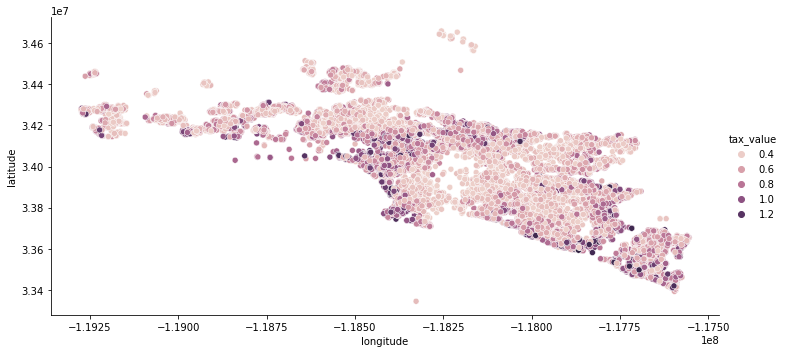

In [7]:
# Show house vlaues create than mean by coorindates, shows a map
value_map = df[df.tax_value > df.tax_value.mean()]
sns.relplot(data=value_map, x='longitude', y='latitude', hue='tax_value', height=5, aspect=2)
plt.show()

### High value house are along the coast, in Los Angeles county, and in Orange county

### What are the drivers of single family property values?

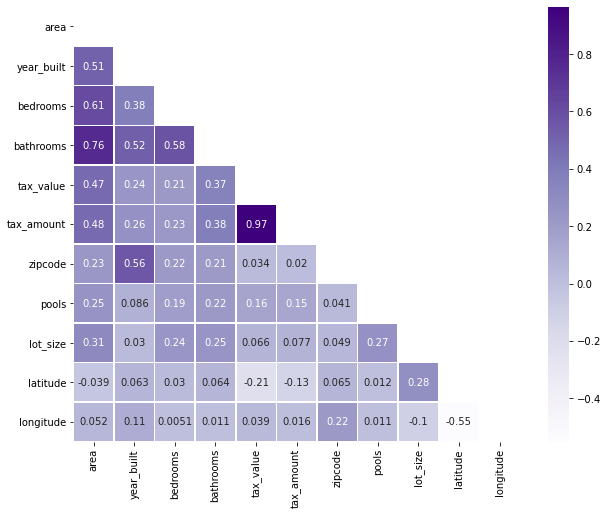

In [8]:
corr_table = train.drop(columns=['fips']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(corr_table))
plt.show()

### Drivers indicated are Area, Bathrooms, Bedrooms, and Year Built

### What is the relationship between value, area, and year built

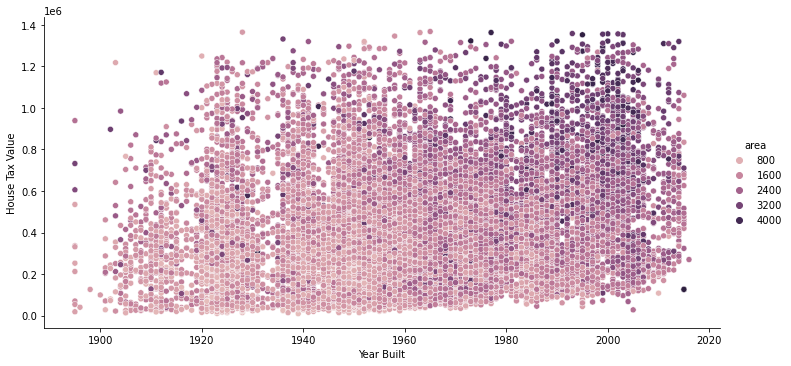

In [9]:
# Shows increased area has  year increased and more high areas have high value
sns.relplot(x='year_built', y='tax_value', data=train, hue='area', kind='scatter', height=5, aspect=2)
plt.xlabel('Year Built')
plt.ylabel('House Tax Value')
plt.show()

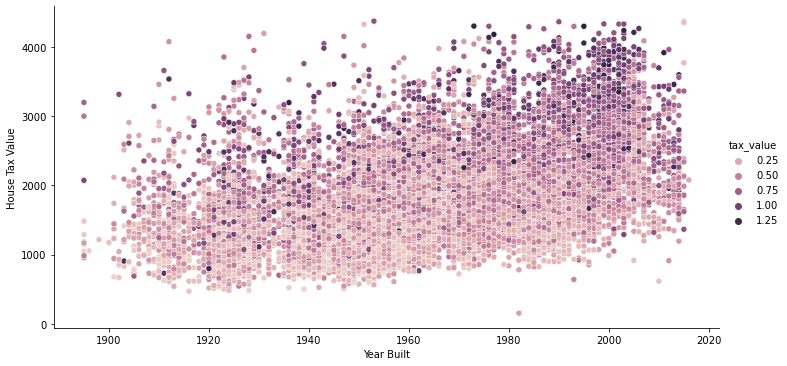

In [10]:
# Shows increased area has  year increased and more high areas have high value
sns.relplot(x='year_built', y='area', data=train, hue='tax_value', kind='scatter', height=5, aspect=2)
plt.xlabel('Year Built')
plt.ylabel('House Tax Value')
plt.show()

### Newer houses got bigger over the years and bigger houses are valued higher

### What is the relationship between value, area, bedroom, and bathrooms

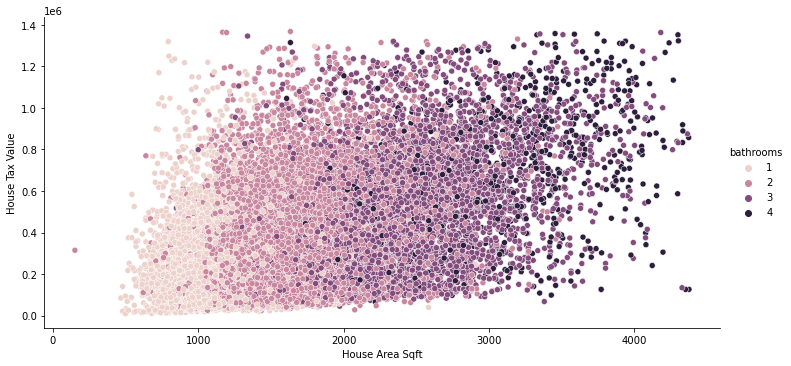

In [11]:
# Shows that bedrooms does not associate to value. Mostly to area.
sns.relplot(x='area', y='tax_value', data=train, hue='bathrooms', kind='scatter', height=5, aspect=2)
plt.xlabel('House Area Sqft')
plt.ylabel('House Tax Value')
plt.show()

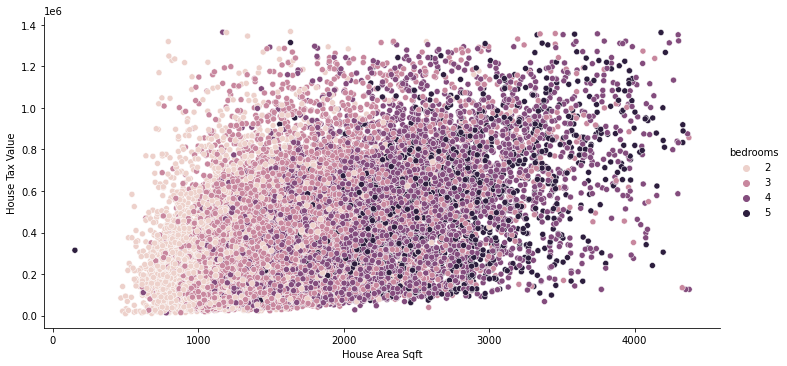

In [12]:
# Shows that bedrooms does not associate to value. Mostly to area.
sns.relplot(x='area', y='tax_value', data=train, hue='bedrooms', kind='scatter', height=5, aspect=2)
plt.xlabel('House Area Sqft')
plt.ylabel('House Tax Value')
plt.show()

### Shows as houses got bigger, the beddrooms and bathrooms increased but it did not increase value

## Explore Summary
- 43K houses across Los Angeles, Ventura, and Orange counties in California
- Los Angeles County has significanly more house then the other counties
- Los Angeles County value distribution peaks between 100-300K
- Ventura and Orange County value distribution peaks between 300-500K
- Los Angeles County has a lower average house values than either Orange or Ventury County individually or combined
- Highest value houses are along the coast, in Los Angeles county, or in Orange county
- Value drivers are Area, Bathrooms, Bedrooms, and Year Built
- Newer houses got bigger over the years and increased in value
- As houses got bigger, the beddrooms and bathrooms increased but it did not increase value

### So What?
- Area, Location, County seem to indicate value
- House features such as bedrooms, bathrooms, pool, and lot size seem to not have an impact on value

In [13]:
df.shape, train.shape, validate.shape, test.shape

((43299, 12), (24247, 12), (10392, 12), (8660, 12))

In [14]:
train.head()

,area,year_built,bedrooms,bathrooms,tax_value,tax_amount,fips,zipcode,pools,lot_size,latitude,longitude
2617,1558,1923,3,1,691642,8665,6037,96027,1,6484,34089256,-118365318
47307,1398,1980,2,2,518000,5373,6059,96954,0,2300,33717859,-117766805
16553,1418,1923,3,2,379700,4754,6037,96507,0,7454,34069398,-117746731
31972,2298,1977,4,2,325368,3542,6111,97091,0,6715,34220094,-119000009
7551,1780,1976,4,2,500406,6114,6037,96356,0,7501,34292776,-118543290


# Scaling & Feature Engineering

In [15]:
X_train, X_validate, X_test, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled, skb_feature, rfe_feature = prepare.wrangle(train, validate, test)

### Used MinMax to Scale then Select K Best and Recursive Feature Elimination (RFE) to Select 3 Best Features

In [16]:
skb_feature

['area', 'year_built', 'bathrooms']

In [17]:
rfe_feature

['area', 'latitude', 'longitude']

###  Select K Best chose: Area, Year Built, and Bathrooms

### RFE chose: Area, Lattitude, and Longitude

# Modeling

### Baseline received RMSE 257K

### Ran 4 Models and Polynomial Regressor performed the best
- Beat others by 

In [18]:
metric_df, X_test_degree2, lm2, y_test = modeling.metric(y_train, y_validate, y_test,X_train_scaled, X_validate_scaled, X_test_scaled)

In [19]:
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,258382.569715,256360.784543
1,ols_egressor,217181.971078,216364.306530
2,lasso_alpha_.01,217181.971161,216364.340497
3,glm_poisson_.01,217329.171273,216583.584355
4,PolynomialRegressor,208921.348517,209353.361351


In [20]:
rmse_test = modeling.poly_final(y_test, X_test_degree2, lm2)

In [22]:
rmse_test

18656812.39547332

### Evaluate
- Accuracy: 80%
- Precision: 68%
- Predicted 243 of which 77 are false

### This model is expected to perform with 80% accuracy on unseen data assuming there are no major changes in our data source. 

## Conclusion

### Summary
Initial Questions:
1. How many customers are churning and not churning?

2. What is the timeline of churn?

3. At what month of tenure are they churning?

4. What non-monetary drivers are associated with churned customers?

5. What monetary drivers are associated with churned customers?

6. Do monetary drivers outweigh non-monetary drivers?

7. What drivers are easiest to change with least amount of impact to the customer?

The questions changed through exploration and the following is what I learned:

- Churn is problem with 27% of customers churning and the highest churn happening at month 1 of tenure.
- Monetary drivers were less clear in groupings than people and service attributes.
- People attributes were greater than service attributes in amounts of significant attributes and churn.
- Of the people attributes, month-to-month contracts, manual payments, paperless billing, and having no dependents, is associated with the highest churn.
- Of the service attributes, not having online security or tech support is associated with the highest churn.
- Top 3 attributes associated with churn: month-to-month contract, manual payments, paperless billing.
- Using the Random Forest Model, expect 80% accuracy with predicting customers that will churn.

### Recommendations
Use the model to predict customers that will churn and promote to those customers a transition to annual contracts, auto payments, or paper billing.

### Next Steps
- With more time, I would explore why churn is occuring highest at first tenure month. 
- What is about the first month of service that people don't like? Do we have a cancellation survey?

### Thank you